In [14]:
import numpy as np
import random
import matplotlib.pyplot as pp
import seaborn as sn
import pandas as pd
import scipy.special as spec
from mpl_toolkits.mplot3d import Axes3D as ax3d
done = False

## Part 1

### A.

In [15]:
def dot_product(vec1, vec2):
    if len(vec1) != len(vec2):
        print("Error: vectors are not of the same length, returning 0")
        return 0
    agg = 0
    for el1, el2 in zip(vec1, vec2):
        agg += el1 * el2
    return agg

In [16]:
# testinmg
length = 5
v1 = [random.randint(-10, 10) for i in range(length)]
v2 = [random.randint(-10, 10) for i in range(length)]
expected = np.dot(v1, v2)
actual = dot_product(v1, v2)
print(f"Expected: {expected} -- Actual: {actual}")

Expected: 88 -- Actual: 88


### B.

In [17]:
def heaviside(val):
    return 1 if val >= 0 else 0

In [18]:
expectedHeav = heaviside(expected)
actualHeav = 1 if expected > 0 else 0
print(f'Expected: {expectedHeav} -- Actual: {actualHeav}')

Expected: 1 -- Actual: 1


### C. & D.

[9, -6, 1, -4, 0]


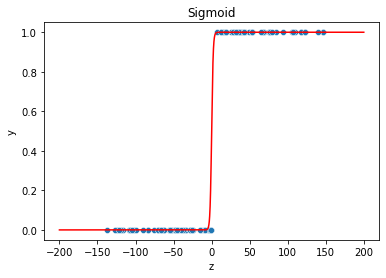

In [19]:
xVals = [[random.randint(-10, 10) for i in range(length)] for x in range(100)]
wVals = [random.randint(-10, 10) for i in range(length)]
df = pd.DataFrame(data=xVals)
print(wVals)
df['z'] = df.apply(lambda row: dot_product(row, wVals), axis=1)
df['y'] = df.apply(lambda row: heaviside(row['z']), axis=1)
sn.scatterplot(data=df, x='z', y='y')
x = np.arange(-200, 200, .1)
y = spec.expit(x)
pp.plot(x, y, color='red')
pp.title('Sigmoid')
pp.show()

## Part 2

In [20]:
def mean_sq_error(errs):
    return (0.5 * len(errs))  * sum([err ** 2 for err in errs])

def perceptron(x, y, maxEpochs=100, alpha=0.5):
    # wCurr = np.array([random.randint(-10, 10) for i in range(len(x[0]))])
    wCurr = np.ones(len(x[0]))
    loss = np.inf
    i = 0
    errors = []
    while loss > 0 and i < maxEpochs:
        for j in range(len(x)):
            # calculate the expected value
            yHat = heaviside(dot_product(x[j], wCurr))
            # calculate the loss
            lossCurr = (y[j] - yHat)
            # recalculate the weights with W[new] = W[old] + alpha * (y[actual] - y[expected]) * {x}
            wCurr = wCurr + ((alpha * lossCurr) * x[j])
            # add to errors list so at end of epoch error sum can be computed
            errors.append(lossCurr)
        i += 1
        loss = mean_sq_error(errors)
        errors = []
    return wCurr

xTest = np.array([[1, 0, 0],
                [1, 0, 1],
                [1, 1, 0],
                [1, 1, 1]])
yTest = np.array([0,1, 1, 1])
w = perceptron(xTest, yTest)
w

array([-0.5,  1. ,  1. ])

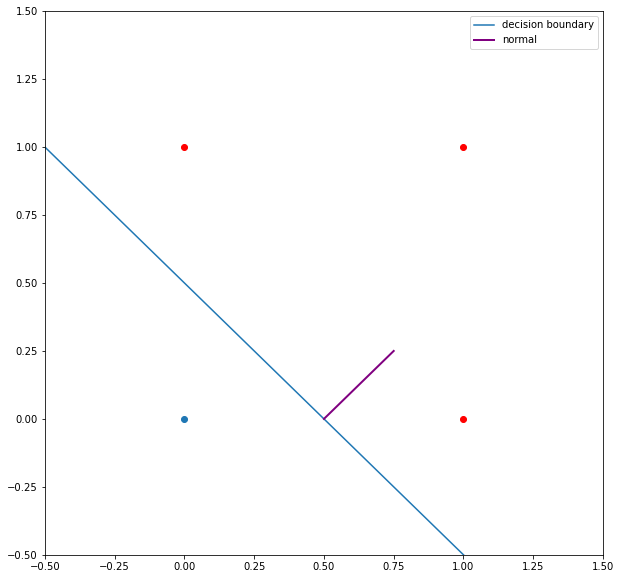

In [29]:
def slope_intercept(x, w):
    return ((w[1] * -x) - w[0]) / w[2]

def normal(x, w):
    return ((w[2]/ w[1]) * x) - (w[0] / w[2])

fig = pp.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.scatter([0], [0])
ax.scatter([0, 1, 1], [1, 0, 1], color='red')

xTest = np.array([[1, 0, 0],
                [1, 0, 1],
                [1, 1, 0],
                [1, 1, 1]])
yTest = np.array([0,1, 1, 1])
w = perceptron(xTest, yTest)
xLine = np.arange(-.5, 1.5, 0.01)
yLine = [slope_intercept(x, w) for x in xLine]
yNorm = slope_intercept(.5, w)
ax.plot(xLine, yLine, label='decision boundary')
pp.plot([.5, .75], [yNorm, .25], 'k-', lw=2, color='purple', label='normal')
yNorm = [normal(x, w) for x in xLine]
# ax.plot(xLine, yNorm)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
pp.legend()
pp.show()

## Part 4

In [22]:
df = pd.read_csv("../iris.data", names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
subDf = df[df['class'] != 'Iris-versicolor'][['sepal length', 'sepal width', 'petal length', 'class']]
# flag for inserting
if not done:
    subDf.insert(0, 'x0', np.ones(len(subDf)))
    done = True

In [23]:
y = np.array([int(val) for val in (subDf['class'] == 'Iris-setosa').to_numpy().flatten()])
subDfArr = subDf[['x0', 'sepal length', 'sepal width', 'petal length']].to_numpy()

In [24]:
# split to train and test
w = perceptron(subDfArr, y)

sub1 = subDfArr[:25]
sub2 = subDfArr[75:]
test = np.concatenate((sub1, sub2))

train = subDfArr[25:75]
testSolve = perceptron(train, y[25:75])

ysub1 = y[:25]
ysub2 = y[75:]
yTest = np.concatenate((ysub1, ysub2))

In [30]:
def plane(x, y, w):
    # w = [b, x, y, z]
    # z = x + y + b
    return ((-w[1] * x) - (w[2] * y) - w[0]) / w[3]

# verifying
# i = 0
# for arr in test:
#     print(f"{heaviside(dot_product(testSolve, arr))} { yTest[i] }")
#     i += 1
# print(testSolve)

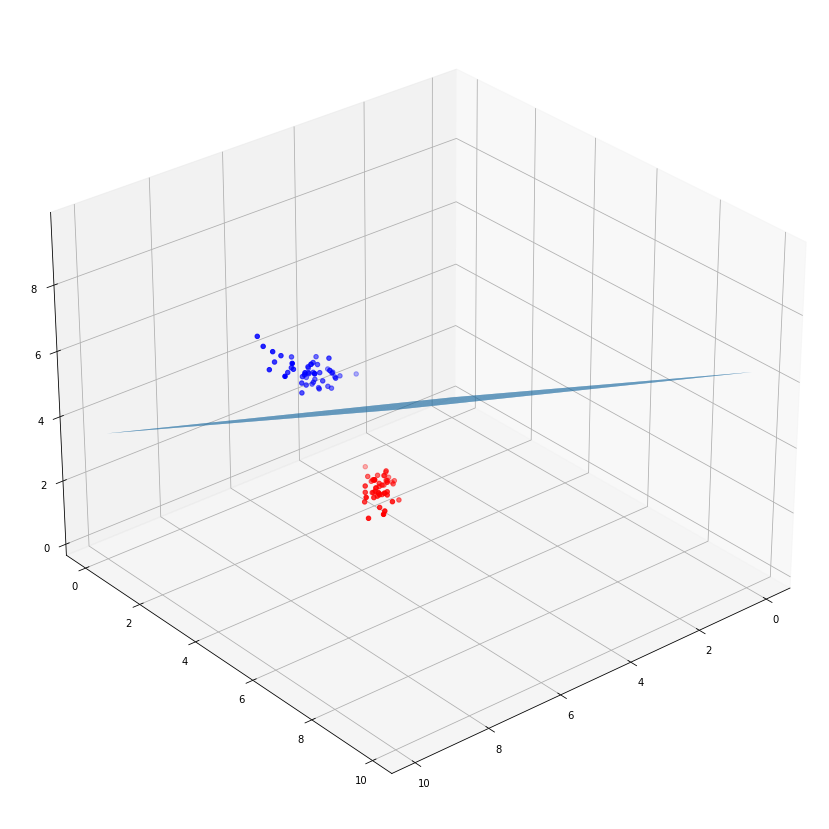

In [26]:
fig = pp.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
positiveVals = subDf[subDf['class'] == 'Iris-setosa'][['sepal length', 'sepal width', 'petal length']].to_numpy()
x, y, z = zip(*positiveVals)
ax.scatter(x, y, z, color='red')

xVals, yVals = np.arange(0, 10, 0.1), np.arange(0, 10, 0.1)
xVals, yVals = np.meshgrid(xVals, yVals)
zVals = [plane(x, y, w) for x, y in zip(xVals, yVals)]
# print(zVals)
ax.plot_surface(xVals, yVals, np.array(zVals))

negativeVals = subDf[subDf['class'] != 'Iris-setosa'][['sepal length', 'sepal width', 'petal length']].to_numpy()
x, y, z = zip(*negativeVals)
ax.scatter(x, y, z, color='blue')

ax.view_init(29, 50)